In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('churn.txt')
df.shape
df.to_csv('churn.csv')

In [3]:
df.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [7]:
df.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [9]:
data = df.drop(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'Churn?'], axis=1)
data.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


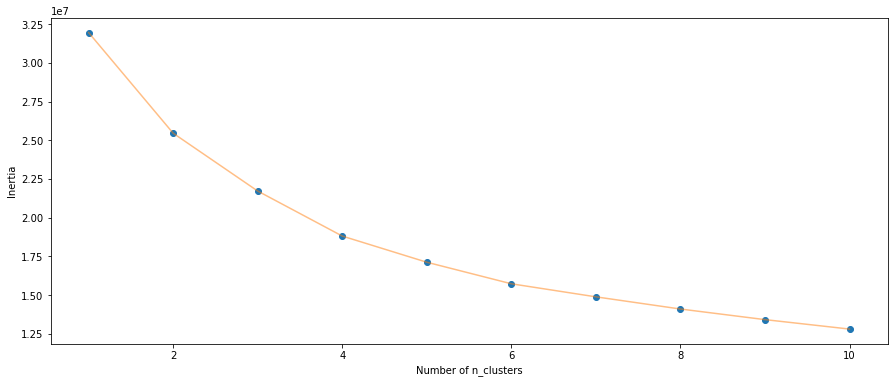

In [11]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1,11):
    clust_model = KMeans(n_clusters= i , init='k-means++', n_init=10)
    clust_model.fit(data)
    inertia.append(clust_model.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of n_clusters') , plt.ylabel('Inertia')
plt.show()

In [13]:
clust_model = KMeans(n_clusters= 5 , init='k-means++', n_init=10)
clusters = clust_model.fit_predict(data)
clusters.shape

(3333,)

In [15]:
df["Clus_KH"] = clusters
df.head(5)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Clus_KH
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,3
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,2
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,1
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,1
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,1


In [23]:
data_clas = df.drop(['State', 'Phone', 'Churn?'],axis=1)
data_clas.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Clus_KH
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,3
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,2
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [19]:
data_clas["Int'l Plan"].unique()

array(['no', 'yes'], dtype=object)

In [20]:
data_clas['VMail Plan'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

Intl_Plan = encoder.fit_transform(data_clas["Int'l Plan"])
data_clas["Int'l Plan"] = Intl_Plan
VMail_Plan = encoder.fit_transform(data_clas["VMail Plan"])
data_clas["VMail Plan"] = Intl_Plan

data_clas.head(5)

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Clus_KH
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,3
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,2
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1


In [34]:
X = data_clas.drop(['Clus_KH'],axis=1).values
Y = data_clas['Clus_KH'].values

In [39]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[:5]

array([[ 0.67648946, -0.52360328, -0.32758048, -0.32758048,  1.23488274,
         1.56676695,  0.47664315,  1.56703625, -0.07060962, -0.05594035,
        -0.07042665,  0.86674322, -0.46549436,  0.86602851, -0.08500823,
        -0.60119509, -0.0856905 , -0.42793202],
       [ 0.14906505, -0.52360328, -0.32758048, -0.32758048,  1.30794844,
        -0.33373776,  1.12450284, -0.33401297, -0.10808036,  0.14486653,
        -0.10754944,  1.05857074,  0.14782467,  1.05938994,  1.24048169,
        -0.60119509,  1.2411686 , -0.42793202],
       [ 0.9025285 , -0.52360328, -0.32758048, -0.32758048, -0.59175986,
         1.16830364,  0.67598459,  1.168464  , -1.57338336,  0.49627857,
        -1.57389963, -0.75686906,  0.19893459, -0.75557074,  0.70312091,
         0.21153386,  0.69715637, -1.1882185 ],
       [-0.42859027, -0.68883427,  3.05268496,  3.05268496, -0.59175986,
         2.19659605, -1.46693591,  2.19675881, -2.74286476, -0.60815927,
        -2.7432675 , -0.07855114, -0.5677142 , -0.078

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2666, 18) (2666,)
(667, 18) (667,)


In [53]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [54]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 3, 0, 4, 1], dtype=int32)

In [55]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8503375843960991
Test set Accuracy:  0.7856071964017991


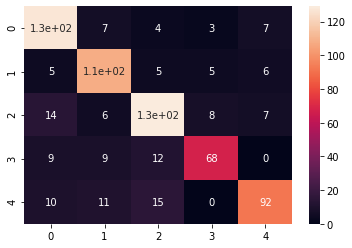

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(y_test,yhat)
label = ["0","1","2","3","4"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()